In [84]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree


In [85]:
data = pd.read_csv(r'C:\Users\hency\OneDrive\Desktop\Internship\day 8\in_class_assignment\Real estate - Real estate.csv')
df1 = pd.DataFrame(data)
print(df1)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [86]:
df1.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [87]:
df3 = df1.dropna()
print(df3)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [88]:
print(df3.duplicated())
df3 = df3.drop_duplicates()
print(df3)

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool
      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                          

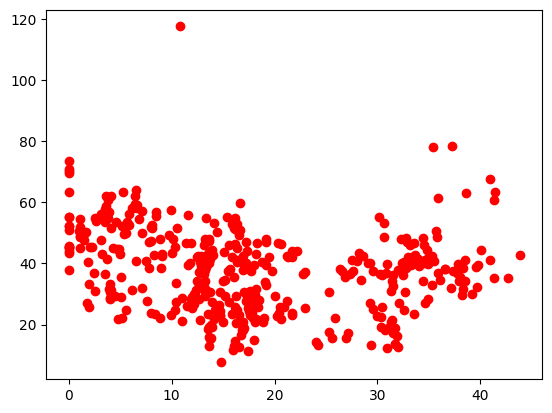

In [89]:
#scatter for linear regression
plt.scatter(df3['X2 house age'],df3['Y house price of unit area'],color='red')
plt.show()
df4 = df3

[32.  19.5 13.3 13.3  5.   7.1 34.5 20.3 31.7 17.9 34.8  6.3 13.  20.4
 13.2 35.7  0.  17.7 16.9  1.5  4.5 10.5 14.7 10.1 39.6 29.3  3.1 10.4
 19.2  7.1 25.9 29.6 37.9 16.5 15.4 13.9 14.7 12.   3.1 16.2 13.6 16.8
 36.1 34.4  2.7 36.6 21.7 35.9 24.2 29.4 21.7 31.3 32.1 13.3 16.1 31.7
 33.6  3.5 30.3 13.3 11.   5.3 17.2  2.6 17.5 40.1  1.   8.5 30.4 12.5
  6.6 35.5 32.5 13.8  6.8 12.3 35.9 20.5 38.2 18.  11.8 30.8 13.2 25.3
 15.1  0.   1.8 16.9  8.9 23.   0.   9.1 20.6 31.9 40.9  8.   6.4 28.4
 16.4  6.4 17.5 12.7  1.1  0.  32.7  0.  17.2 12.2 31.4  4.   8.1 33.3
  9.9 14.8 30.6 20.6 30.9 13.6 25.3 16.6 13.3 13.6 31.5  0.   9.9  1.1
 38.6  3.8 41.3 38.5 29.6  4.  26.6 18.  33.4 18.9 11.4 13.6 10.  12.9
 16.2  5.1 19.8 13.6 11.9  2.1  0.   3.2 16.4 34.9 35.8  4.9 12.   6.5
 16.9 13.8 30.7 16.1 11.6 15.5  3.5 19.2 16.   8.5  0.  13.7  0.  28.2
 27.6  8.4 24.   3.6  6.6 41.3  4.3 30.2 13.9 33.  13.1 14.  26.9 11.6
 13.5 17.  14.1 31.4 20.9  8.9 34.8 16.3 35.3 13.2 43.8  9.7 15.2 15.2
 22.8 

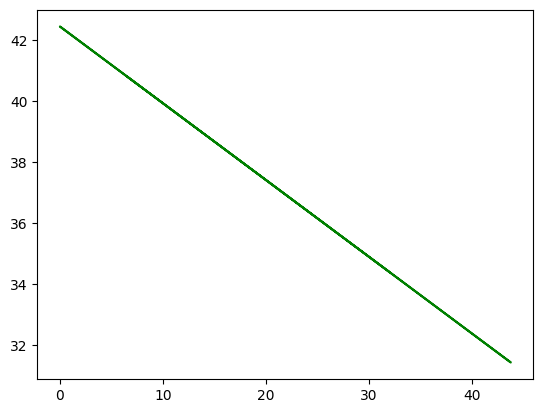

Accuracy of the model is 4.43


In [90]:
#linear regression plot
regr = linear_model.LinearRegression()
x = np.asanyarray(df4['X2 house age'])
y = np.asanyarray(df4['Y house price of unit area'])

print(x)
print(y)

X = x.reshape(-1,1)

out = regr.fit(X,y)
plt.plot(x,regr.predict(X),color="g")
# print("Please enter your age")
plt.show()

Accuracy=r2_score(y,regr.predict(X))*100
print("Accuracy of the model is %.2f" %Accuracy)

In [91]:
#linear regression prediction
d=float(input("Enter the house age: "))

b=regr.predict([[d]])[0]
print("Housing Prince: "+str(b))

Housing Prince: 34.387067635531835


In [92]:
regr = linear_model.LinearRegression()
x = df4[['X2 house age','X3 distance to the nearest MRT station']]
y = np.asanyarray(df4['Y house price of unit area'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)
Y = regr.fit(X_train,y_train)
print(X_test)
y_pred = regr.predict(X_test)
print(y_pred)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X_train: (331, 2)
X_test: (83, 2)
Y_train: (331,)
Y_test: (83,)
     X2 house age  X3 distance to the nearest MRT station
356          10.3                                211.4473
170          24.0                               4527.6870
224          34.5                                324.9419
331          25.6                               4519.6900
306          14.4                                169.9803
..            ...                                     ...
308          16.4                                289.3248
100          17.5                                964.7496
7            20.3                                287.6025
22           14.7                               1360.1390
68           30.4                                464.2230

[83 rows x 2 columns]
[46.04792813 11.97396703 39.45178255 11.64846298 45.36348746 37.78032833
 40.24130839 38.8072795  45.51685803 43.12000517 45.051024   44.44149963
 45.64507961 40.76535425 47.06679643 37.03735463 38.70222453 48.6963450

House price of unit area: [41.7624961]
Accuracy of the model is 54.76


C:\Users\hency\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


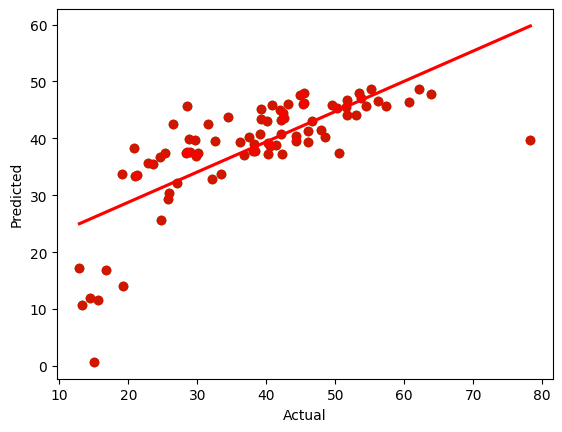

In [93]:
#multi linear regression plot and prediction

#values for 'X2 house age' and 'X3 distance to the nearest MRT station'
b = regr.predict([[32,84.87882]])
print("House price of unit area: {}".format(b))
plt.scatter(y_test,y_pred,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
Accuracy=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()

In [110]:
X = df4.iloc[:, 2:3]
print(X)
y = df4.iloc[:, 7]
print(y)

     X2 house age
0            32.0
1            19.5
2            13.3
3            13.3
4             5.0
..            ...
409          13.7
410           5.6
411          18.8
412           8.1
413           6.5

[414 rows x 1 columns]
0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


C:\Users\hency\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Predicted price:  25



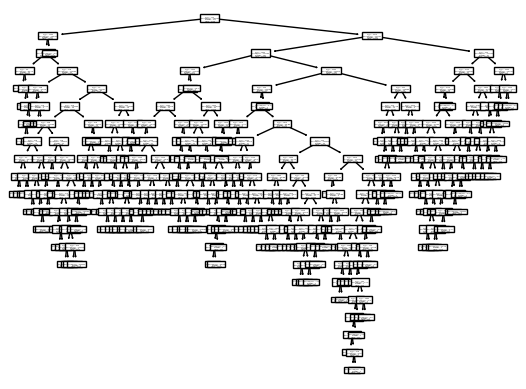

In [112]:
regressor = DecisionTreeRegressor(random_state = 0)
clf = regressor.fit(X, y)
tree.plot_tree(clf)
export_graphviz(regressor, out_file ='tree.dot',
feature_names =['Production Cost'])

y_pred = regressor.predict([[32]])
print("Predicted price: % d\n"% y_pred)

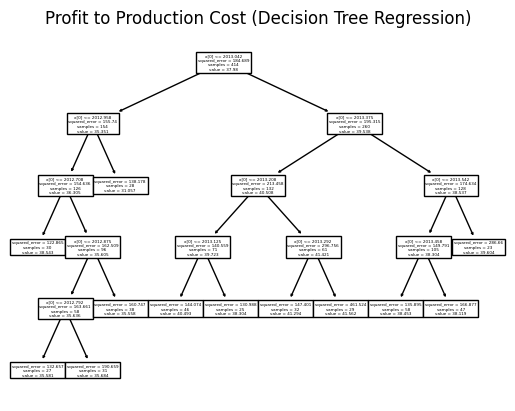

In [108]:
#X_grid = np.arange(min(X), max(X), 0.01)
tree.plot_tree(clf)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Profit to Production Cost (Decision Tree Regression)')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.savefig("decision.png")
plt.show()